# 1) Importar o DataSet

In [498]:
import pandas as pd
df = pd.read_csv("dataset.csv")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn import svm

# 2)Analisar o DataSet

In [499]:
df.sample(4) #Primeira visao do data set

,genero,estado_civil,zona_residencia,imc,fumador,class_etaria,custo
1357,feminino,casado,urbana,32.6,nao,adulto_jovem,2296.3
10,masculino,casado,rural,24.8,nao,adulto_jovem,10031.8
603,feminino,casado,urbana,36.9,nao,adulto_meia_idade,3185.2
2138,feminino,casado,urbana,27.1,nao,adulto_meia_idade,11278.4


In [500]:
df.columns
#output
#Index(['genero', 'estado_civil', 'zona_residencia', 'imc', 'fumador',
 #      'class_etaria', 'custo'],
 #     dtype='object')

Index(['genero', 'estado_civil', 'zona_residencia', 'imc', 'fumador',
       'class_etaria', 'custo'],
      dtype='object')

In [501]:
df.shape
#Output
#(2215, 7)

(2215, 7)

In [502]:
custo_mean= df['custo'].mean()
custo_std= df['custo'].std()
custo_var= df['custo'].var()

print("Custo mean: ", custo_mean)
print("Custo std: ", custo_std)
print("Custo variancia: ", custo_var)
#Output
#Custo mean:  6045.710970654628
#Custo std:  8354.316703251743
#Custo variancia:  69794607.57823108

Custo mean:  6045.710970654628
Custo std:  8354.316703251743
Custo variancia:  69794607.57823108


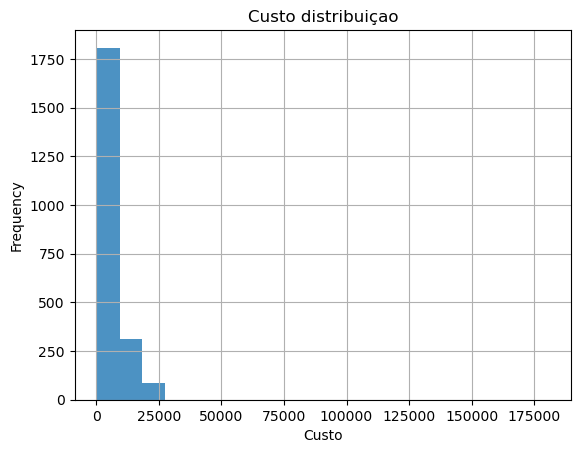

In [503]:
ax = df["custo"].plot.hist(bins=20, alpha=0.8)
ax.set_xlabel("Custo")
ax.set_title("Custo distribuiçao")
ax.grid(True)
plt.show()

#repara-se uma distribuiçao altamente assimetrica(cauda da esq para a direita)

In [504]:
df.head()
#output
#genero	estado_civil	zona_residencia	imc	fumador	class_etaria	custo
#0	masculino	casado	suburbana	35.8	sim	adulto_meia_idade	18213.9
#1	feminino	separado	urbana	39.3	nao	adulto_senior	4266.4
#2	masculino	solteiro	rural	40.7	nao	jovem	854.6
#3	masculino	casado	urbana	28.2	sim	adulto_meia_idade	10169.7
#4	feminino	solteiro	urbana	31.1	nao	adulto_senior	4151.5

,genero,estado_civil,zona_residencia,imc,fumador,class_etaria,custo
0,masculino,casado,suburbana,35.8,sim,adulto_meia_idade,18213.9
1,feminino,separado,urbana,39.3,nao,adulto_senior,4266.4
2,masculino,solteiro,rural,40.7,nao,jovem,854.6
3,masculino,casado,urbana,28.2,sim,adulto_meia_idade,10169.7
4,feminino,solteiro,urbana,31.1,nao,adulto_senior,4151.5


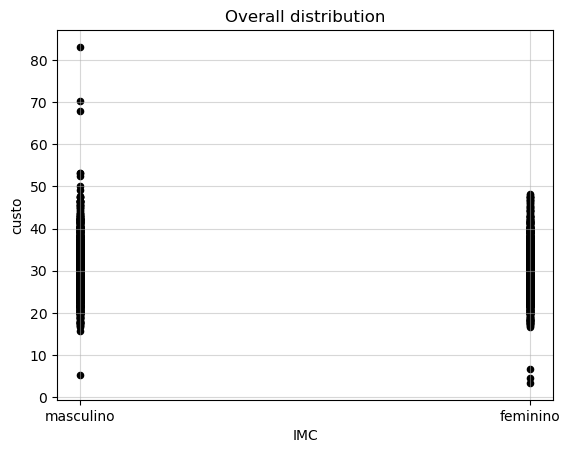

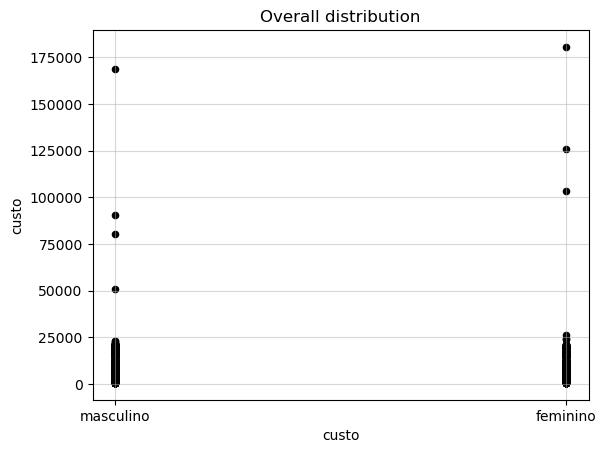

In [505]:
df.plot(x='genero', y='imc', kind='scatter', c='black')
plt.title("Overall distribution")
plt.xlabel("IMC")
plt.ylabel("custo")
plt.grid(True, alpha=0.5)
plt.show()

df.plot(x='genero', y='custo', kind='scatter', c='black')
plt.title("Overall distribution")
plt.xlabel("custo")
plt.ylabel("custo")
plt.grid(True, alpha=0.5)
plt.show()

In [506]:
df.describe() #Já é possivel imaginar possiveis outliers
#imc	custo
#count	2215.000000	2215.000000
#mean	30.704199	6045.710971
#std	6.425918	8354.316703
#min	3.400000	487.200000
#25%	26.150000	2042.200000
#50%	30.400000	4050.700000
#75%	34.700000	7176.300000
#max	83.100000	180544.400000

,imc,custo
count,2215.000000,2215.000000
mean,30.704199,6045.710971
std,6.425918,8354.316703
min,3.400000,487.200000
25%,26.150000,2042.200000
50%,30.400000,4050.700000
75%,34.700000,7176.300000
max,83.100000,180544.400000


In [507]:
import seaborn as sns
import matplotlib.pyplot as plt

BoxPlot -> Destaca os valores extremos (Outliers)

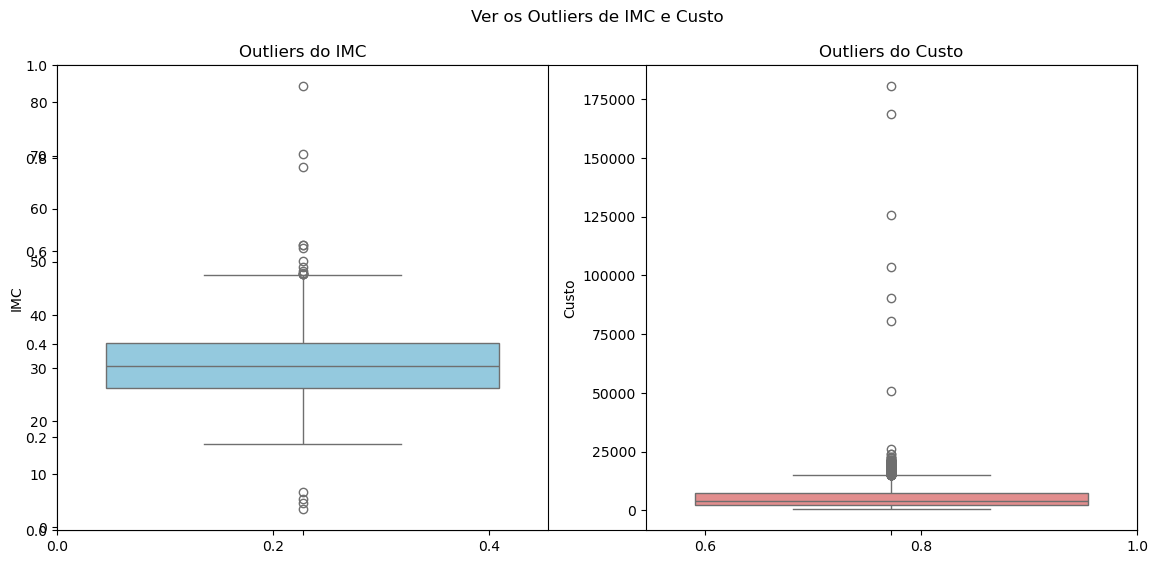

In [508]:
plt.figure(figsize=(12, 6))
plt.title("Ver os Outliers de IMC e Custo\n\n")

plt.subplot(1, 2, 1)
sns.boxplot(data=df, y='imc', color='skyblue')
plt.title('Outliers do IMC')
plt.ylabel('IMC')

plt.subplot(1, 2, 2)
sns.boxplot(data=df, y='custo', color='lightcoral')
plt.title('Outliers do Custo')
plt.ylabel('Custo')

# Exibir o gráfico
plt.tight_layout()
plt.show()

Histogramas -> Distribuiçao dos valores

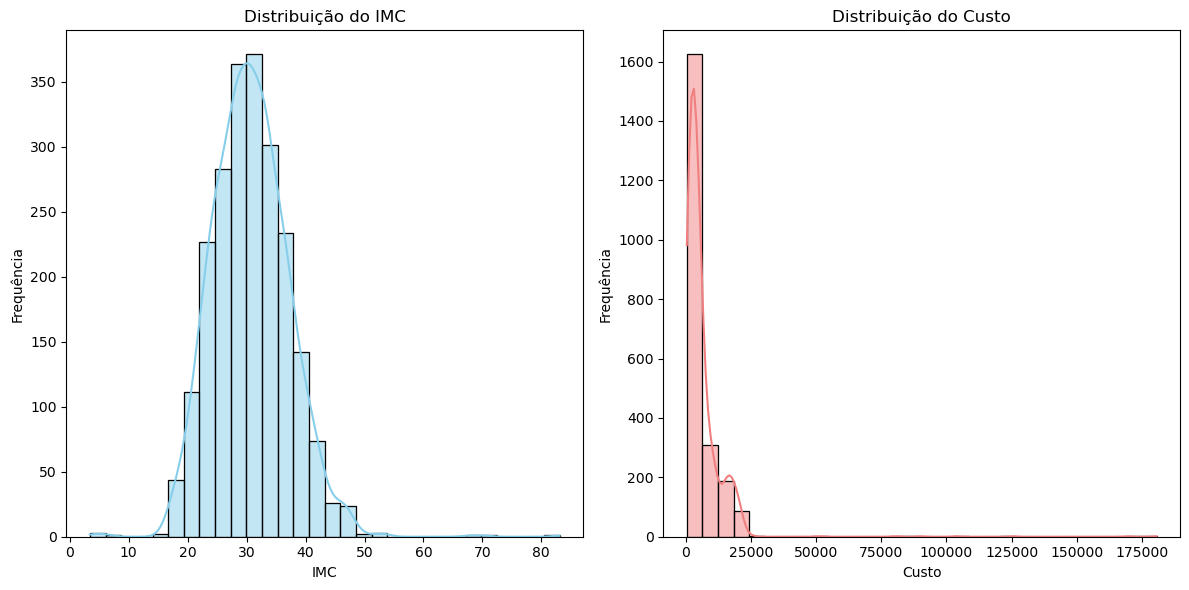

In [509]:
plt.figure(figsize=(12, 6))

# Histograma para 'imc'
plt.subplot(1, 2, 1)
sns.histplot(df['imc'], bins=30, kde=True, color='skyblue')
plt.title('Distribuição do IMC')
plt.xlabel('IMC')
plt.ylabel('Frequência')

# Histograma para 'custo'
plt.subplot(1, 2, 2)
sns.histplot(df['custo'], bins=30, kde=True, color='lightcoral')
plt.title('Distribuição do Custo')
plt.xlabel('Custo')
plt.ylabel('Frequência')

# Exibir o gráfico
plt.tight_layout()
plt.show()

Conclui-se que deve-se aplicar o método Tukey Fences ou método Z-score.

# 3) Pré-Processamento

In [510]:
print(df.isnull().sum())  # Verificar valores nulos
df.drop_duplicates(keep='first',inplace=True) #Eliminar valores duplicados caso existam

genero             0
estado_civil       0
zona_residencia    0
imc                0
fumador            0
class_etaria       0
custo              0
dtype: int64


Foi usado o metodo Tukey Fences pois apresentou menos outliers. Tentativa com o z-score pois distribuiçao normal

In [511]:
# Calcular os quartis Q1 e Q3 para 'imc'
Q1_imc = df['imc'].quantile(0.25)
Q3_imc = df['imc'].quantile(0.75)

# Calcular o IQR (intervalo interquartil) para 'imc'
IQR_imc = Q3_imc - Q1_imc

# Fatores para os limites de Tukey Fences
fator_1_5 = 2.2  # Limites moderados (padrão)

# Limites de Tukey Fences para 'imc'
limite_inferior = Q1_imc - fator_1_5 * IQR_imc
limite_superior = Q3_imc + fator_1_5 * IQR_imc

# Exibir os limites calculados
print("Limite inferior (1.5 * IQR) para 'imc': ", limite_inferior)
print("Limite superior (1.5 * IQR) para 'imc': ", limite_superior)

Limite inferior (1.5 * IQR) para 'imc':  7.259999999999991
Limite superior (1.5 * IQR) para 'imc':  53.56500000000001


In [512]:
# outliers no 'imc'
outliers_imc = df[(df['imc'] < limite_inferior) | (df['imc'] > limite_superior)]

print("Quantidade de outliers em 'imc' a ser eliminada: ",outliers_imc.shape[0])
print(outliers_imc[['imc']]) 
#output
#Quantidade de outliers em 'imc' a ser eliminada:  6
#       imc
#320   67.8
#355    4.6
#727   83.1
#1059   5.3
#1773  70.3
#1823   3.4

Quantidade de outliers em 'imc' a ser eliminada:  7
       imc
320   67.8
355    4.6
727   83.1
1059   5.3
1494   6.7
1773  70.3
1823   3.4


In [513]:
# Filtrando o DataFrame para remover os outliers com base nos limites de Tukey Fences
df = df[(df['imc'] >= limite_inferior) & (df['imc'] <= limite_superior)]

<Axes: ylabel='imc'>

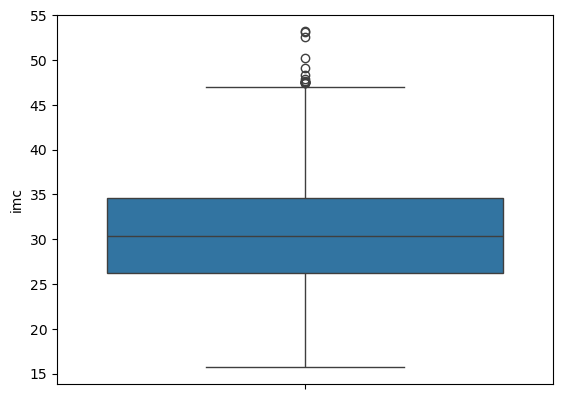

In [514]:
sns.boxplot(data=df['imc']) #Hum temos claramente muitos valores discrepantes (Outliers)

Bom para dados assimétricos: Funciona bem quando os dados possuem assimetria ou são distribuídos de forma não normal (como distribuições com caudas longas).
Não depende de suposições sobre a distribuição dos dados: Não requer que os dados sigam uma distribuição normal.

ELIMINAR ENTRE 7 E 12

custo

In [515]:
Q1 = df['custo'].quantile(0.25)
Q3 = df['custo'].quantile(0.75)

IQR = Q3 - Q1

fator_07 = 3.3 #Parece ser o que melhor influencia o resultado da correlacao(mais abaixo)

limite_inferior = Q1 - fator_07 * IQR
limite_superior = Q3 + fator_07 * IQR
limite_inferior=0
# Exibir os novos limites
print("Limite inferior (1.5 * IQR): ", limite_inferior) # nao faz sentido pode ser ajustado para zero.
print("Limite superior (1.5 * IQR): ", limite_superior)

Limite inferior (1.5 * IQR):  0
Limite superior (1.5 * IQR):  24169.050000000003


In [516]:
# outliers no 'custo'
outliers_custo = df[(df['custo'] < limite_inferior) | (df['custo'] > limite_superior)]

print("Quantidade de outliers em 'custo' a ser eliminada: ",outliers_custo.shape[0])
print(outliers_custo[['custo']])
#Output


Quantidade de outliers em 'custo' a ser eliminada:  8
         custo
745    26239.5
993   168788.6
1120   50839.8
1307  103539.5
1667   90396.4
1862   80516.1
1973  180544.4
2049  125590.2


In [517]:
# Eliminar os outliers de custo
df = df[(df['custo'] >= limite_inferior) & (df['custo'] <= limite_superior)]

In [518]:
df_ordenado_asc = df.sort_values(by='custo', ascending=False)
df_ordenado_des = df.sort_values(by='custo', ascending=True)
print(df_ordenado_asc['custo'].head(4)) # Novos valores mais altos
print(df_ordenado_des['custo'].head(4)) # Novos valores mais baixos

128     23793.1
869     23792.8
1058    22698.0
433     22694.3
Name: custo, dtype: float64
1842    487.2
215     487.3
2196    487.5
877     490.1
Name: custo, dtype: float64


In [519]:
print(df['custo'].describe())

count     2199.000000
mean      5696.695362
std       5144.365460
min        487.200000
25%       2042.200000
50%       4037.000000
75%       7101.300000
max      23793.100000
Name: custo, dtype: float64


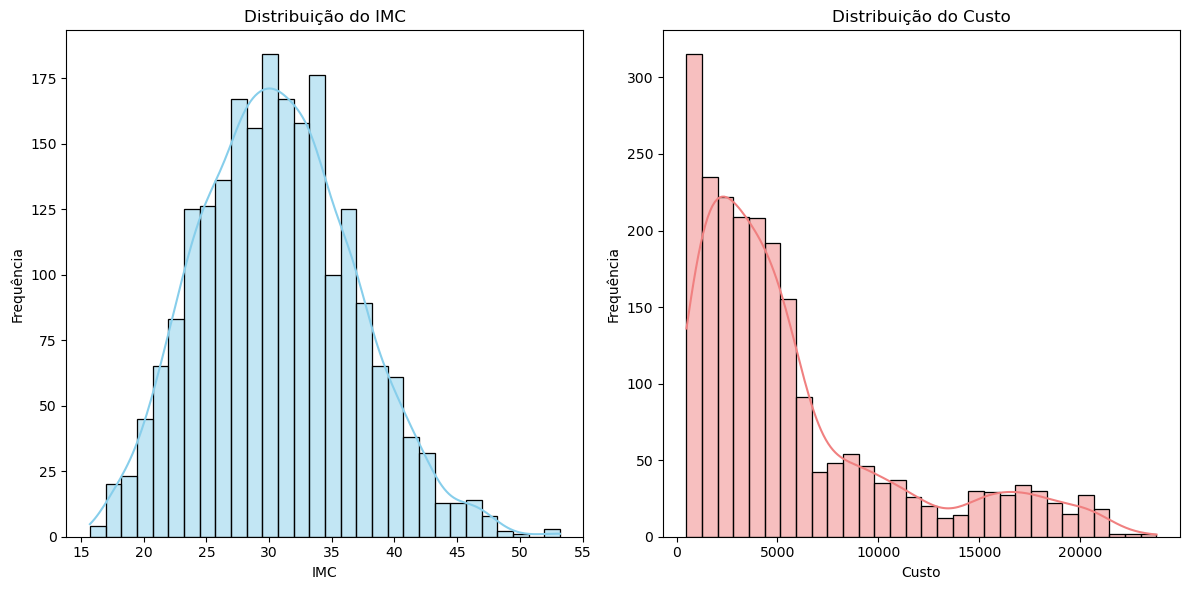

In [520]:
plt.figure(figsize=(12, 6))

# Histograma para 'imc'
plt.subplot(1, 2, 1)
sns.histplot(df['imc'], bins=30, kde=True, color='skyblue')
plt.title('Distribuição do IMC')
plt.xlabel('IMC')
plt.ylabel('Frequência')

# Histograma para 'custo'
plt.subplot(1, 2, 2)
sns.histplot(df['custo'], bins=30, kde=True, color='lightcoral')
plt.title('Distribuição do Custo')
plt.xlabel('Custo')
plt.ylabel('Frequência')

# Exibir o gráfico
plt.tight_layout()
plt.show()

<Axes: ylabel='custo'>

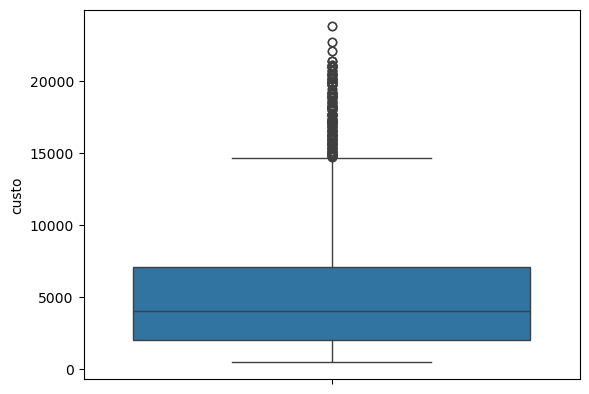

In [521]:
sns.boxplot(data=df['custo'])

Melhor visto que vamos aplicar o algoritmo SVM nao devemos ter valores extremos muito distantes.

In [522]:
df.describe()

,imc,custo
count,2199.000000,2199.000000
mean,30.668759,5696.695362
std,6.121481,5144.365460
min,15.700000,487.200000
25%,26.150000,2042.200000
50%,30.400000,4037.000000
75%,34.600000,7101.300000
max,53.200000,23793.100000


In [523]:
df.shape
#Output
#(2196, 7)

(2199, 7)

In [524]:
df['genero'] = df['genero'].map({'masculino': 1, 'feminino': 0})
df['fumador'] = df['fumador'].map({'sim': 1, 'nao': 0})

In [525]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np
encoder = OneHotEncoder(sparse_output=False,drop='first') #Deixa no formato matriz em vez de array2D
ohe = encoder.fit_transform(df[['estado_civil','zona_residencia','class_etaria']])
print(ohe[0]) #Espera-se 4+3+6 valores

[0. 0. 0. 1. 0. 0. 1. 0. 0. 0.]


In [526]:
df.drop(['estado_civil', 'zona_residencia', 'class_etaria'], axis=1, inplace=True) #Eliminar as colunas 

In [527]:
X = df.drop('custo',axis=1) # Apenas Features 
X = np.c_[X, ohe] # Junta as variaveis do OHE
y = df['custo'] # Apenas o target
print(X[0]) #Vemos as variaveis (Genero, IMC, Fumador, 4 para estado_civil, 3 para zona_residencia e 6 para class_etaria)

[ 1.  35.8  1.   0.   0.   0.   1.   0.   0.   1.   0.   0.   0. ]


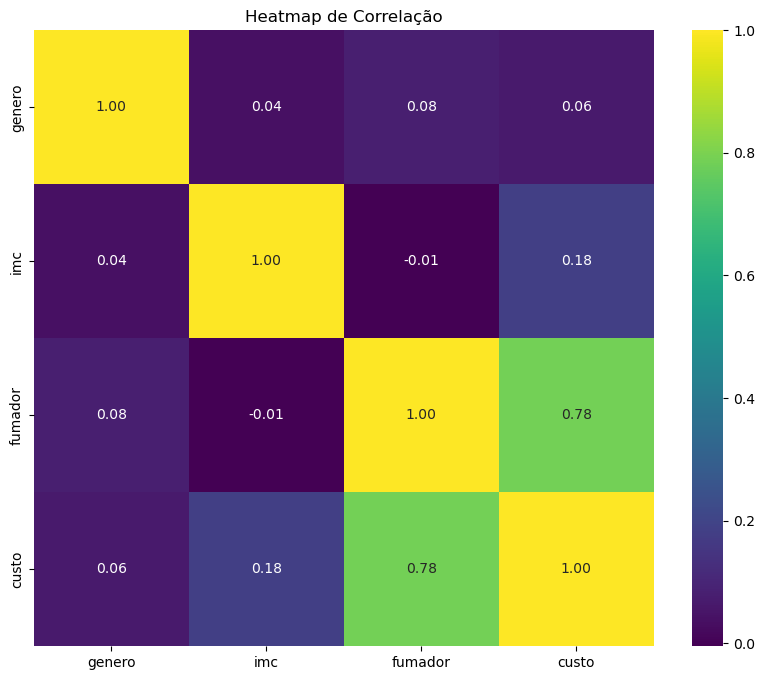

In [528]:
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="viridis", cbar=True)
plt.title("Heatmap de Correlação")
plt.show()

Antes de normalizar

In [529]:
from sklearn.model_selection import train_test_split
Xtreino,Xteste,ytreino,yteste = train_test_split(X,y,test_size=0.2,random_state=5)

In [530]:
Xtreino

array([[ 0. , 39.3,  0. , ...,  0. ,  1. ,  0. ],
       [ 1. , 36. ,  1. , ...,  0. ,  0. ,  0. ],
       [ 0. , 36.2,  0. , ...,  0. ,  0. ,  0. ],
       ...,
       [ 0. , 44.4,  0. , ...,  0. ,  0. ,  0. ],
       [ 1. , 23.9,  0. , ...,  0. ,  0. ,  1. ],
       [ 0. , 30.2,  1. , ...,  0. ,  0. ,  0. ]])

In [531]:
yteste

656      2641.8
420      3867.6
2188    10345.5
1360      938.6
726      3928.4
         ...   
811      2190.9
958      1092.7
623       494.8
2113     1903.9
1235     4904.3
Name: custo, Length: 440, dtype: float64

In [532]:
from sklearn.svm import SVR
modelo = SVR()
modelo.fit(Xtreino,ytreino)
modelo.score(Xteste,yteste) #Metrica R2
#Output
#-0.10434437835146904

-0.0704299120052283

In [533]:
Xtreino[0]

array([ 0. , 39.3,  0. ,  0. ,  1. ,  0. ,  1. ,  0. ,  0. ,  0. ,  0. ,
        1. ,  0. ])

Pos normalizar

In [534]:
from sklearn.preprocessing import StandardScaler
#Para o treino
# Criar escaladores para X e y
scaler_X = StandardScaler()  # Escalador para X (variáveis independentes)
scaler_y = StandardScaler()  # Escalador para y (variável dependente)

#scaler_X.fit(Xtreino) #Escalador ajustado a Xtreino pode ser usado no futuro para Xteste
#scaler_y.fit(ytreino.values.reshape(-1,1))  #Ajustar escalador ao ytreino

# Transformar os dados de teste com os mesmos escaladores
Xtreino_normalizado = scaler_X.fit_transform(Xtreino)  # Transformando Xteste com os parâmetros de Xtreino
ytreino_normalizado = scaler_y.fit_transform(ytreino.values.reshape(-1, 1))  # Transformando yteste com os parâmetros de ytreino

In [535]:
Xtreino_normalizado[0]

array([-1.00056867,  1.39584407, -0.50815946, -0.45527489,  1.29668903,
       -0.32173463,  1.60022772, -0.93662579, -0.52405885, -0.66201704,
       -0.46705893,  3.31149308, -0.36018977])

In [536]:
modelo = SVR()
modelo.fit(Xtreino_normalizado, ytreino_normalizado.ravel())

SVR()

In [537]:
#Normalizar Xteste com o scalerX ajustado
Xteste_normalizado = scaler_X.transform(Xteste)

#Normalizar yteste com o scalery ajustado
yteste_normalizado = scaler_y.transform(yteste.values.reshape(-1, 1))

modelo.score(Xteste_normalizado, yteste_normalizado)
#Output
#0.8615204389139494

0.8596039027172833

In [538]:
Xtreino_normalizado[0]

array([-1.00056867,  1.39584407, -0.50815946, -0.45527489,  1.29668903,
       -0.32173463,  1.60022772, -0.93662579, -0.52405885, -0.66201704,
       -0.46705893,  3.31149308, -0.36018977])

In [539]:
Xtreino_normalizado[1]

array([ 0.99943166,  0.86024011,  1.96788622, -0.45527489, -0.77119493,
       -0.32173463,  1.60022772, -0.93662579, -0.52405885,  1.51053514,
       -0.46705893, -0.30197859, -0.36018977])

Agora Ajusta-se os hiperparametros

In [540]:
from sklearn.model_selection import GridSearchCV

In [541]:
grelha={'C':[4,3,2,1],'gamma':['auto','scale', 1,5, 0.1],'kernel':['rbf','linear'],'epsilon': [0.01, 0.1]}

In [542]:
procura_modelo = GridSearchCV(modelo, param_grid=grelha,cv=10)

In [543]:
procura_modelo.fit(Xtreino_normalizado,ytreino_normalizado.ravel())

GridSearchCV(cv=10, estimator=SVR(),
             param_grid={'C': [4, 3, 2, 1], 'epsilon': [0.01, 0.1],
                         'gamma': ['auto', 'scale', 1, 5, 0.1],
                         'kernel': ['rbf', 'linear']})

In [544]:
procura_modelo.best_params_
#Output:{'C': 2, 'epsilon': 0.1, 'gamma': 'auto', 'kernel': 'rbf'}

{'C': 2, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}

In [545]:
modelo_otimo=procura_modelo.best_estimator_

In [546]:
modelo_otimo.score(Xteste_normalizado,yteste_normalizado)
#Output
#0.8664837512538721
#0.8666273675074774->drop
#0.8666273675074774

0.8652088733698249

In [547]:
previsao = modelo_otimo.predict(Xteste_normalizado)

In [548]:
y0_prev = scaler_y.inverse_transform(previsao.reshape(-1, 1))

In [549]:
yteste.mean()

5341.134545454546

In [550]:
for i in range (1,10):
    print("Real: ", yteste.iloc[i])
    print("previsto: ",y0_prev[i])
#Output

Real:  3867.6
previsto:  [3811.33024243]
Real:  10345.5
previsto:  [9959.18193837]
Real:  938.6
previsto:  [1348.63446152]
Real:  3928.4
previsto:  [3799.20022543]
Real:  1661.2
previsto:  [2025.54958141]
Real:  1064.9
previsto:  [629.08743351]
Real:  4942.4
previsto:  [4854.41800857]
Real:  2578.6
previsto:  [2365.31711075]
Real:  11621.5
previsto:  [12228.63413198]


In [551]:
yteste = yteste.reset_index(drop=True)

# Comparar previsões com os valores reais
resultados = pd.DataFrame({
    'Valor Real': yteste,
    'Valor Previsto': y0_prev.flatten()  # Remover dimensões extras
})

# Calcular o erro absoluto
resultados['Erro Absoluto'] = abs(resultados['Valor Real'] - resultados['Valor Previsto'])
erro_medio = resultados['Erro Absoluto'].mean()

print(f"Erro Médio Absoluto: {erro_medio}")

#Output:
#Erro Médio Absoluto: 1006.249690527165

#Erro Médio Absoluto: 963.3158228076373
#904.6152829720374 usando drop

#904.3473300885852

Erro Médio Absoluto: 904.3473300885852


In [552]:
resultados['Erro Percentual'] = resultados['Erro Absoluto'] / resultados['Valor Real'] * 100
mape = resultados['Erro Percentual'].mean()
print(f"Erro Percentual Médio Absoluto (MAPE): {mape:.2f}%")
#Output
#Erro Percentual Médio Absoluto (MAPE): 21.98%
#Erro Percentual Médio Absoluto (MAPE): 22.04% ->3
#Erro Percentual Médio Absoluto (MAPE): 21.10%
#21.55% drop

#21.27%

Erro Percentual Médio Absoluto (MAPE): 21.27%


In [553]:
from sklearn.inspection import permutation_importance


Importância das características:
              feature  importancia
2             fumador     1.102974
1                 imc     0.190066
11              idoso     0.106588
10      adulto_senior     0.097076
4            solteiro     0.056360
3            separado     0.021771
9   adulto_meia_idade     0.021034
5               viuvo     0.016617
8        adulto_jovem     0.015182
12              jovem     0.013864
6           suburbana     0.010360
0              genero     0.007152
7              urbana     0.003890


C:\Users\Francisco Guedes\AppData\Local\Temp\ipykernel_12444\2533042232.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importancia', y='feature', data=importance_df, palette='plasma')


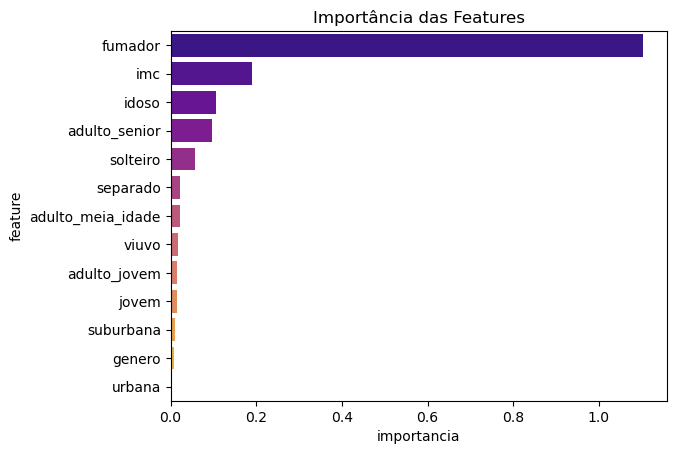

In [554]:
# Gerar os nomes das colunas para as variáveis codificadas
estado_civil_cols = encoder.categories_[0][1:]
zona_residencia_cols = encoder.categories_[1][1:]
class_etaria_cols = encoder.categories_[2][1:]

# Unir todos os nomes das colunas
novas_colunas = ['genero', 'imc', 'fumador'] + list(estado_civil_cols) + list(zona_residencia_cols) + list(class_etaria_cols)

# Converta X de volta para DataFrame com as colunas apropriadas
X_df = pd.DataFrame(X, columns=novas_colunas)

# Agora, podemos usar X_df.columns em vez de X.columns
perm_importance = permutation_importance(modelo_otimo, Xteste_normalizado, yteste_normalizado, scoring='neg_mean_squared_error',n_repeats=10)

# Criar o DataFrame para organizar as importâncias
importance_df = pd.DataFrame({
    'feature': X_df.columns,
    'importancia': perm_importance.importances_mean
})

# Ordenar o DataFrame com base na importância
importance_df = importance_df.sort_values(by='importancia', ascending=False)

# Exibir os resultados
print("\nImportância das características:")
print(importance_df)

# Gráfico da importância das características
sns.barplot(x='importancia', y='feature', data=importance_df, palette='plasma')
plt.title("Importância das Features")
plt.show()

In [555]:
df_just_features = pd.read_csv("just_features.csv")

In [556]:
df_just_features.head()
df_just_features.describe()

,imc
count,550.000000
mean,30.788182
std,5.877773
min,17.100000
25%,26.400000
50%,30.550000
75%,35.100000
max,46.800000


In [557]:
# 4.1. Mapear as variáveis categóricas como no treinamento
df_just_features['genero'] = df_just_features['genero'].map({'masculino': 1, 'feminino': 0})
df_just_features['fumador'] = df_just_features['fumador'].map({'sim': 1, 'nao': 0})

# 4.2. Aplicar One-Hot Encoding da mesma forma que foi feito no treino
# As categorias devem ser as mesmas para garantir que o encoder trate as mesmas variáveis corretamente
encoder = OneHotEncoder(sparse_output=False,drop='first')  # Deixa no formato matriz em vez de array2D
ohe = encoder.fit_transform(df_just_features[['estado_civil', 'zona_residencia', 'class_etaria']])

# 4.3. Remover as colunas categóricas originais e adicionar as variáveis One-Hot codificadas
df_just_features.drop(['estado_civil', 'zona_residencia', 'class_etaria'], axis=1, inplace=True)
df_just_features = np.c_[df_just_features, ohe]
df_just_features

array([[ 0. , 25.6,  1. , ...,  0. ,  0. ,  0. ],
       [ 0. , 23.1,  1. , ...,  1. ,  0. ,  0. ],
       [ 1. , 26.3,  0. , ...,  0. ,  0. ,  0. ],
       ...,
       [ 1. , 26.8,  0. , ...,  0. ,  0. ,  0. ],
       [ 1. , 34.5,  0. , ...,  0. ,  0. ,  0. ],
       [ 0. , 28.5,  0. , ...,  1. ,  0. ,  0. ]])

In [558]:
# 4.4. Normalizar os dados, pois o modelo foi treinado com dados normalizados
# Normalizar com o mesmo scaler usado no treino
X_normalizado = scaler_X.transform(df_just_features)  # Aqui usamos o scaler_X do treinamento
X_normalizado[8]

array([ 0.99943166,  0.25971445, -0.50815946, -0.45527489, -0.77119493,
       -0.32173463, -0.62491106,  1.06766225, -0.52405885,  1.51053514,
       -0.46705893, -0.30197859, -0.36018977])

In [559]:
# 4.5. Realizar a previsão
previsoes = modelo_otimo.predict(X_normalizado)

# 4.6. Inverter a normalização de y (custo)
previsoes = scaler_y.inverse_transform(previsoes.reshape(-1, 1))

# 4.7. Criar DataFrame com as previsões
df_previsoes = pd.DataFrame(previsoes, columns=['custo'])

# 4.8. Salvar as previsões no arquivo CSV
df_previsoes.to_csv("teste_custos_estimados.csv", index=False)